# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [27]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_diabetes = pd.read_csv("diabetes_dataset.csv")
df_kidney = pd.read_csv("Kidney_dataset.csv")
df_hypertension = pd.read_csv("hypertension_dataset.csv")

print("Diabetes Dataset:")
print(df_diabetes.head(), "\n")

print("Kidney Dataset:")
print(df_kidney.head(), "\n")

print("Hypertension Dataset:")
print(df_hypertension.head(), "\n")

Diabetes Dataset:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0      

/tmp/ipykernel_51492/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

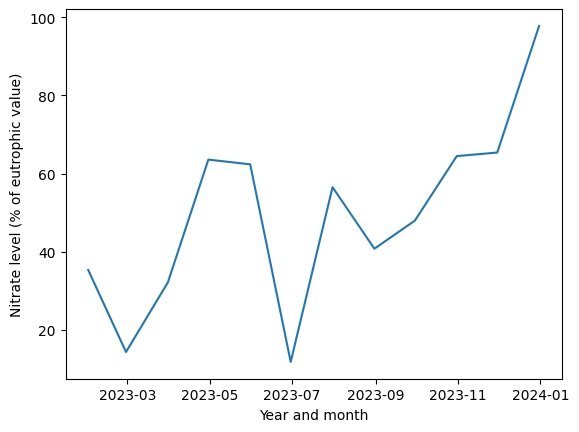

In [28]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_51492/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

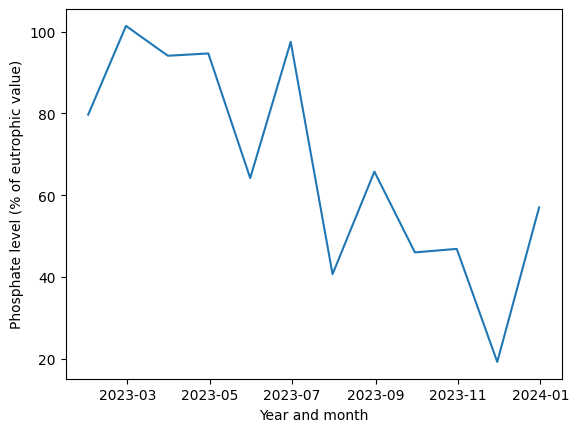

In [29]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

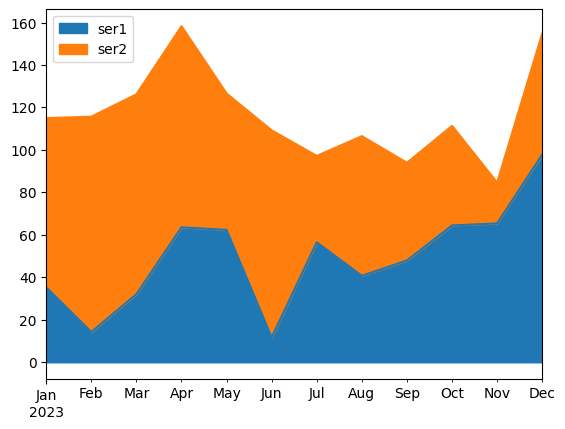

In [30]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

## My changes: 
Add alpha 0.6 to allow for visible overlap, change size, add lables and title

<Axes: title={'center': 'Nitrate and Phosphate Levels Over Time'}, xlabel='Date', ylabel='% of eutrophic value'>

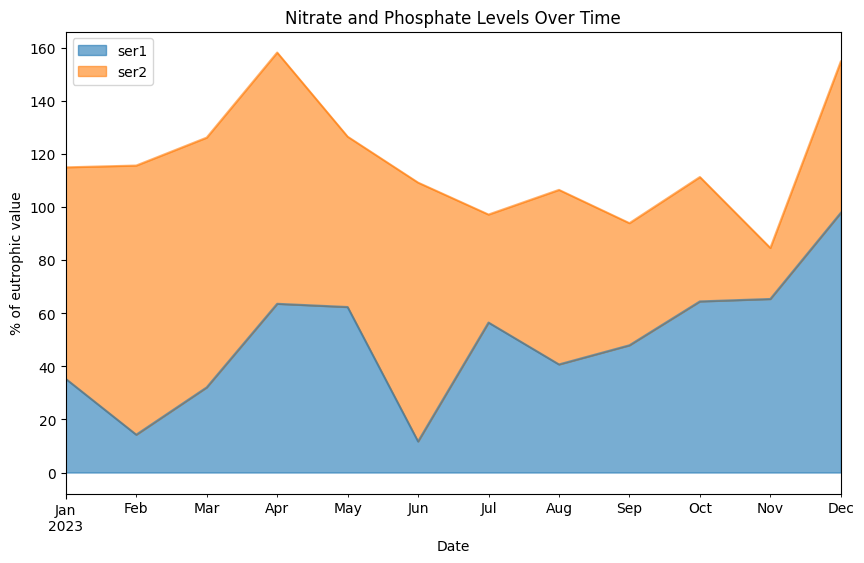

In [31]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area(alpha=0.6, figsize=(10, 6), ylabel='% of eutrophic value', xlabel='Date', title='Nitrate and Phosphate Levels Over Time')

# Advantages and Disadvantages of Area Plot: 

Advantages:
Visual - visually engaging and show the magnitude of values 
Combination - shows BOTH contributions therefore shows total over time
Trends - easier to see trends/patterns and compare over time

Disadvantages:
Overlap - May overlap and be confusing to interpret
Not Ideal for independent variables

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

# **Diabetes Dataset**

## Grouped Histogram of BMI and Diabetes

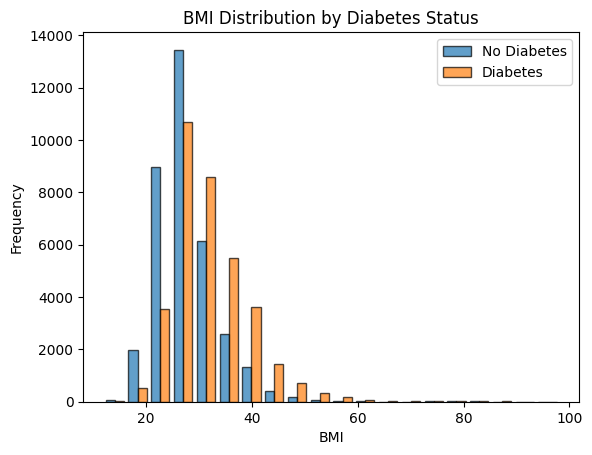

In [32]:
plt.hist(
    [df_diabetes[df_diabetes["Diabetes_binary"] == 0]["BMI"],
     df_diabetes[df_diabetes["Diabetes_binary"] == 1]["BMI"]],
    bins=20,
    label=["No Diabetes", "Diabetes"],
    edgecolor='black',
    alpha=0.7
)
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Grouped Histogram Age and Diabetes

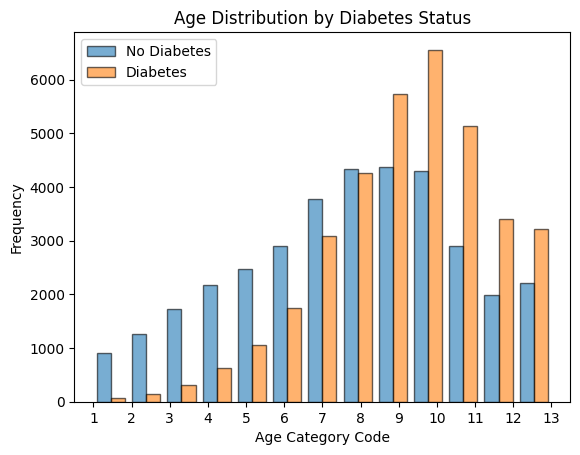

In [33]:
plt.hist(
    [df_diabetes[df_diabetes["Diabetes_binary"] == 0]["Age"],
     df_diabetes[df_diabetes["Diabetes_binary"] == 1]["Age"]],
    bins=13,
    label=["No Diabetes", "Diabetes"],
    edgecolor='black',
    alpha=0.6
)
plt.title("Age Distribution by Diabetes Status")
plt.xlabel("Age Category Code")
plt.ylabel("Frequency")
plt.legend()
plt.xticks(range(1, 14))
plt.show()

## Bar plot of Smoking Status and Diabetes

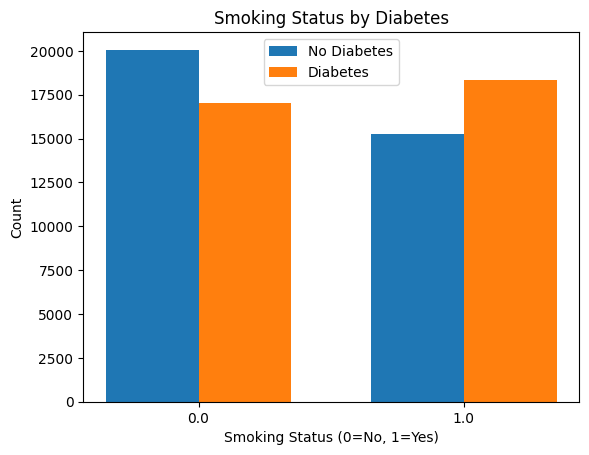

In [34]:
smoking_no_diabetes = df_diabetes[df_diabetes["Diabetes_binary"] == 0]["Smoker"].value_counts().sort_index()
smoking_diabetes = df_diabetes[df_diabetes["Diabetes_binary"] == 1]["Smoker"].value_counts().sort_index()
smoking_categories = smoking_no_diabetes.index
x = np.arange(len(smoking_categories))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, smoking_no_diabetes, width, label='No Diabetes')
ax.bar(x + width/2, smoking_diabetes, width, label='Diabetes')

ax.set_xlabel('Smoking Status (0=No, 1=Yes)')
ax.set_ylabel('Count')
ax.set_title('Smoking Status by Diabetes')
ax.set_xticks(x)
ax.set_xticklabels(smoking_categories)
ax.legend()

plt.show()

## Bar Plot Physical Activity Level and Diabetes
0 = Lower Physical Activity
1 = HIgher Physical Activity

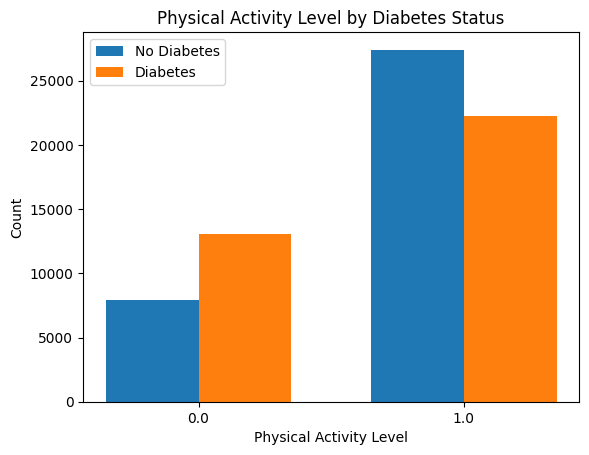

In [35]:
counts = df_diabetes.groupby(['PhysActivity', 'Diabetes_binary']).size().unstack(fill_value=0)

labels = counts.index.tolist()
no_diabetes_counts = counts[0].tolist()
diabetes_counts = counts[1].tolist()

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, no_diabetes_counts, width, label='No Diabetes')
ax.bar(x + width/2, diabetes_counts, width, label='Diabetes')

ax.set_xlabel('Physical Activity Level')
ax.set_ylabel('Count')
ax.set_title('Physical Activity Level by Diabetes Status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

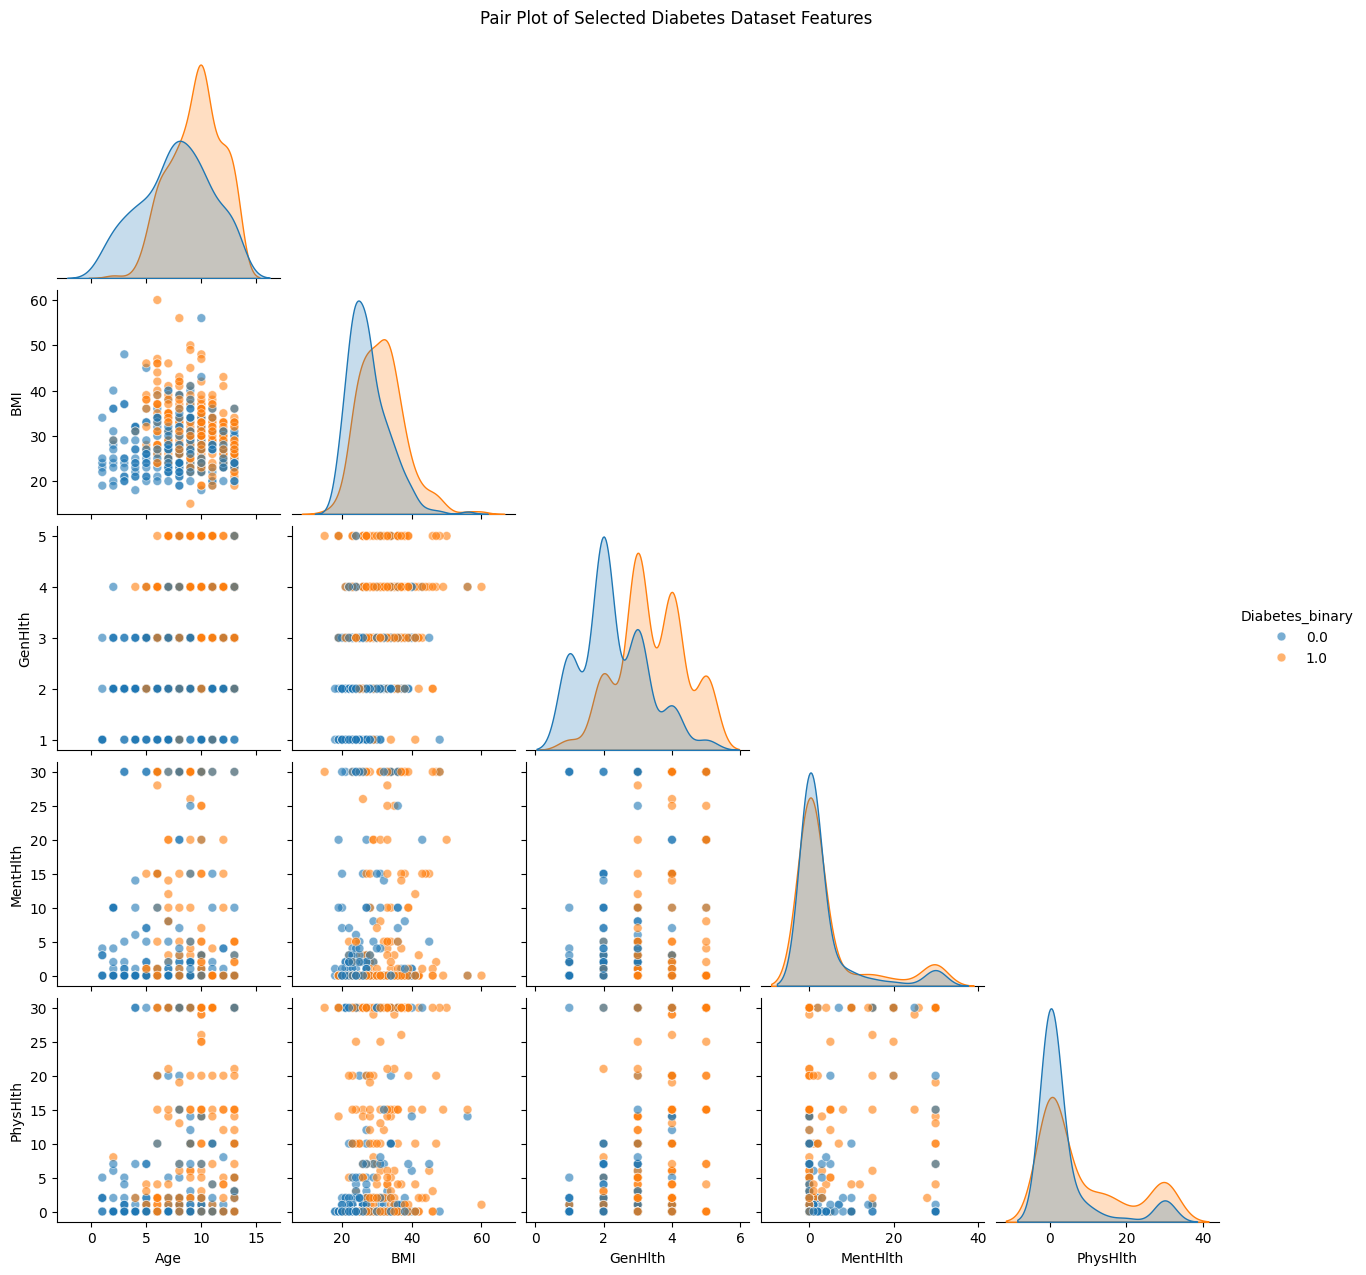

In [36]:
df_diabetes_sample = df_diabetes.sample(500, random_state=42)
cols = ["Age", "BMI", "GenHlth", "MentHlth", "PhysHlth", "Diabetes_binary"]
df_diabetes_sample = df_diabetes.sample(500, random_state=42)

sns.pairplot(df_diabetes_sample[cols], hue="Diabetes_binary", diag_kind="kde", corner=True,
             plot_kws={"alpha": 0.6, "s": 40})
plt.suptitle("Pair Plot of Selected Diabetes Dataset Features", y=1.02)
plt.show()

# **Diabetes Dataset Bivariate Conclusions:**

We observed several expected relationships between variables. The grouped histograms showed that BMI and age(demographic) are both associated with diabetes. Higher BMI and older age appear more likely to have diabetes. We also observed lifestyle factors, physical activity and smoking status. There was a pattern that those who reported no/lower physical activity had a higher likelihood of diabetes. Smoking showed a weaker relationship but may still be a contributing factor when combined with others. Overall, the data appears usable and consistent with our expectations, and it provides a good foundation for building predictive or explanatory models moving forward.

# **Hypertension Dataset**

## Grouped Histogram Age and Hypertension

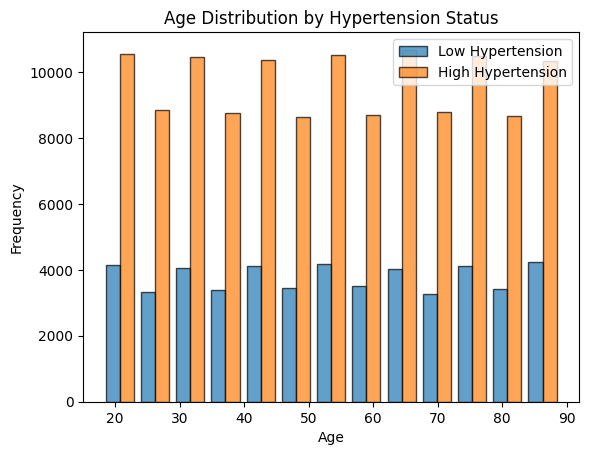

In [37]:
plt.hist(
    [df_hypertension[df_hypertension["Hypertension"] == "Low"]["Age"],
     df_hypertension[df_hypertension["Hypertension"] == "High"]["Age"]],
    bins=13,
    label=["Low Hypertension", "High Hypertension"],
    edgecolor='black',
    alpha=0.7
)
plt.title("Age Distribution by Hypertension Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Normalized Bar Plot Grouped Age and Hypertension

/tmp/ipykernel_51492/3080251651.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = df_hypertension.groupby(["AgeGroup", "Hypertension"]).size().unstack(fill_value=0)


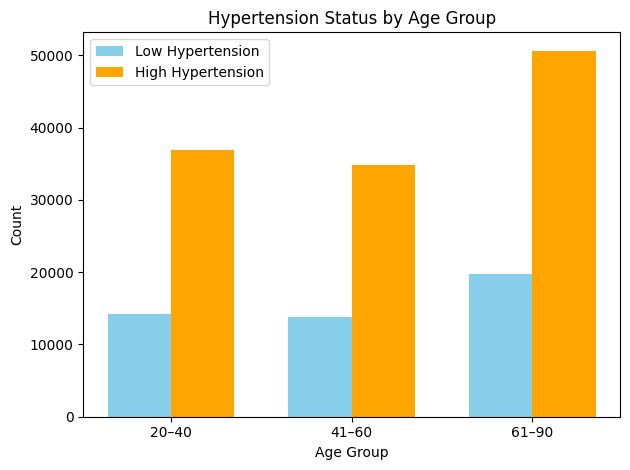

In [38]:
bins = [20, 40, 60, 90]
labels = ["20–40", "41–60", "61–90"]
df_hypertension["AgeGroup"] = pd.cut(df_hypertension["Age"], bins=bins, labels=labels, include_lowest=True)

group_counts = df_hypertension.groupby(["AgeGroup", "Hypertension"]).size().unstack(fill_value=0)
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, group_counts["Low"], width, label="Low Hypertension", color="skyblue")
ax.bar(x + width/2, group_counts["High"], width, label="High Hypertension", color="orange")
ax.set_xlabel("Age Group")
ax.set_ylabel("Count")
ax.set_title("Hypertension Status by Age Group")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

## Grouped Histogram BMI and Hypertension

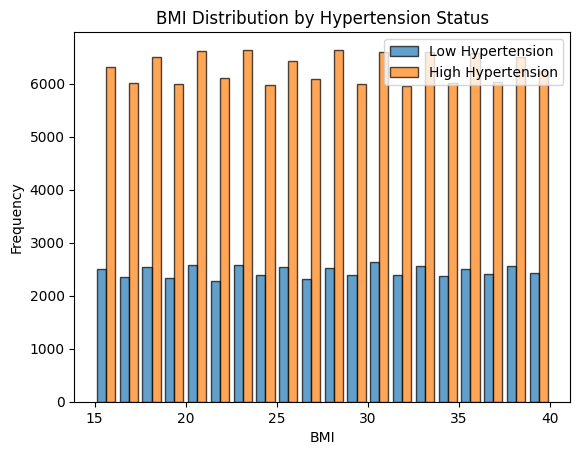

In [39]:
plt.hist(
    [df_hypertension[df_hypertension["Hypertension"] == "Low"]["BMI"],
     df_hypertension[df_hypertension["Hypertension"] == "High"]["BMI"]],
    bins=20,
    label=["Low Hypertension", "High Hypertension"],
    edgecolor='black',
    alpha=0.7
)
plt.title("BMI Distribution by Hypertension Status")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Bar Plot Grouped BMI and Hypertension

/tmp/ipykernel_51492/2278763469.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_counts = df_hypertension.groupby(['BMI_Category', 'Hypertension']).size().unstack(fill_value=0)


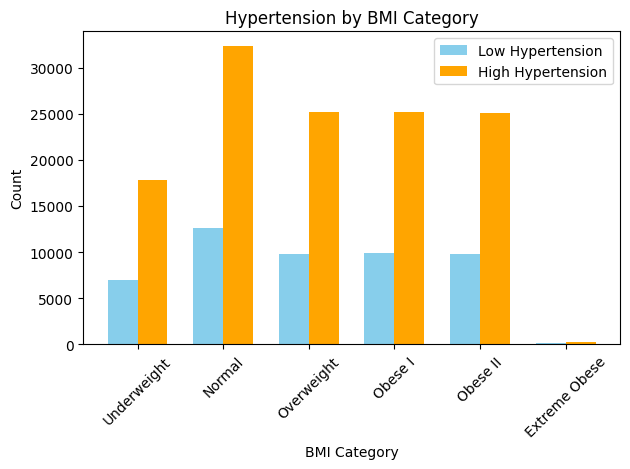

In [40]:
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]  # Typical BMI categories
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Extreme Obese']
df_hypertension['BMI_Category'] = pd.cut(df_hypertension['BMI'], bins=bmi_bins, labels=bmi_labels)
bmi_counts = df_hypertension.groupby(['BMI_Category', 'Hypertension']).size().unstack(fill_value=0)

labels = bmi_counts.index.tolist()
low_ht = bmi_counts["Low"].tolist()
high_ht = bmi_counts["High"].tolist()

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, low_ht, width, label='Low Hypertension', color='skyblue')
ax.bar(x + width/2, high_ht, width, label='High Hypertension', color='orange')

ax.set_xlabel('BMI Category')
ax.set_ylabel('Count')
ax.set_title('Hypertension by BMI Category')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

## % Normalized Bar Plot Smoking Status and Hypertension

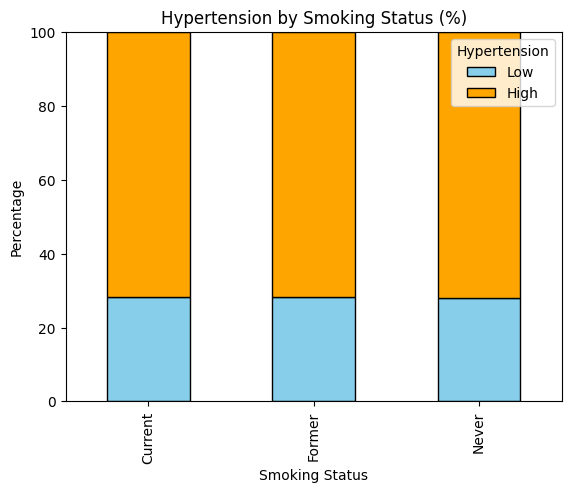

In [41]:
smoke_ct = pd.crosstab(df_hypertension["Smoking_Status"], df_hypertension["Hypertension"], normalize='index') * 100
smoke_ct = smoke_ct[["Low", "High"]]
custom_colors = ["skyblue", "orange"]
smoke_ct.plot(kind="bar", stacked=True, color=custom_colors, edgecolor="black")
plt.title("Hypertension by Smoking Status (%)")
plt.ylabel("Percentage")
plt.xlabel("Smoking Status")
plt.legend(title="Hypertension")
plt.ylim(0, 100)
plt.show()

## Bar Plot Physical Acitivity Level and Hypertension

['High', 'Low']


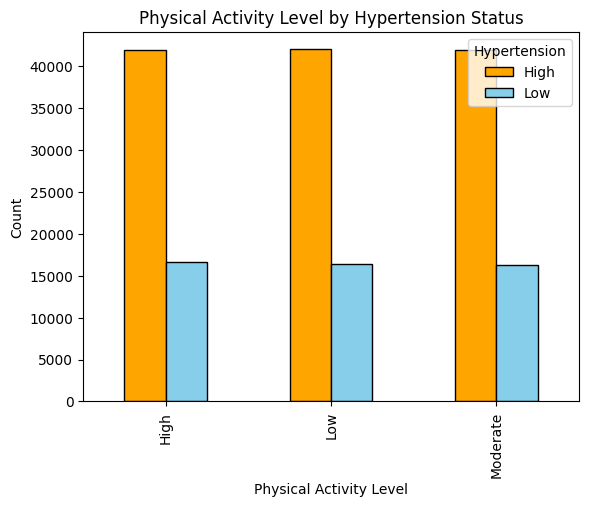

In [42]:
phys_act_counts = df_hypertension.groupby(['Physical_Activity_Level', 'Hypertension']).size().unstack()
print(phys_act_counts.columns.tolist())
phys_act_counts.plot(kind='bar', edgecolor='black', color=['orange', 'skyblue'])

plt.title("Physical Activity Level by Hypertension Status")
plt.xlabel("Physical Activity Level")
plt.ylabel("Count")
plt.legend(title="Hypertension")
plt.show()

## Normalized Bar Plot Physical Activity and Hypertension

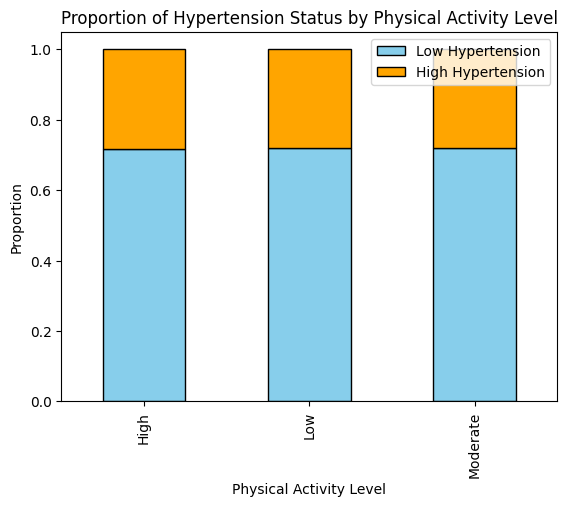

In [43]:
counts = pd.crosstab(df_hypertension["Physical_Activity_Level"], df_hypertension["Hypertension"], normalize='index')

counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], edgecolor='black')
plt.title("Proportion of Hypertension Status by Physical Activity Level")
plt.xlabel("Physical Activity Level")
plt.ylabel("Proportion")
plt.legend(["Low Hypertension", "High Hypertension"])
plt.show()

## Pair Plot Hypertension Dataset

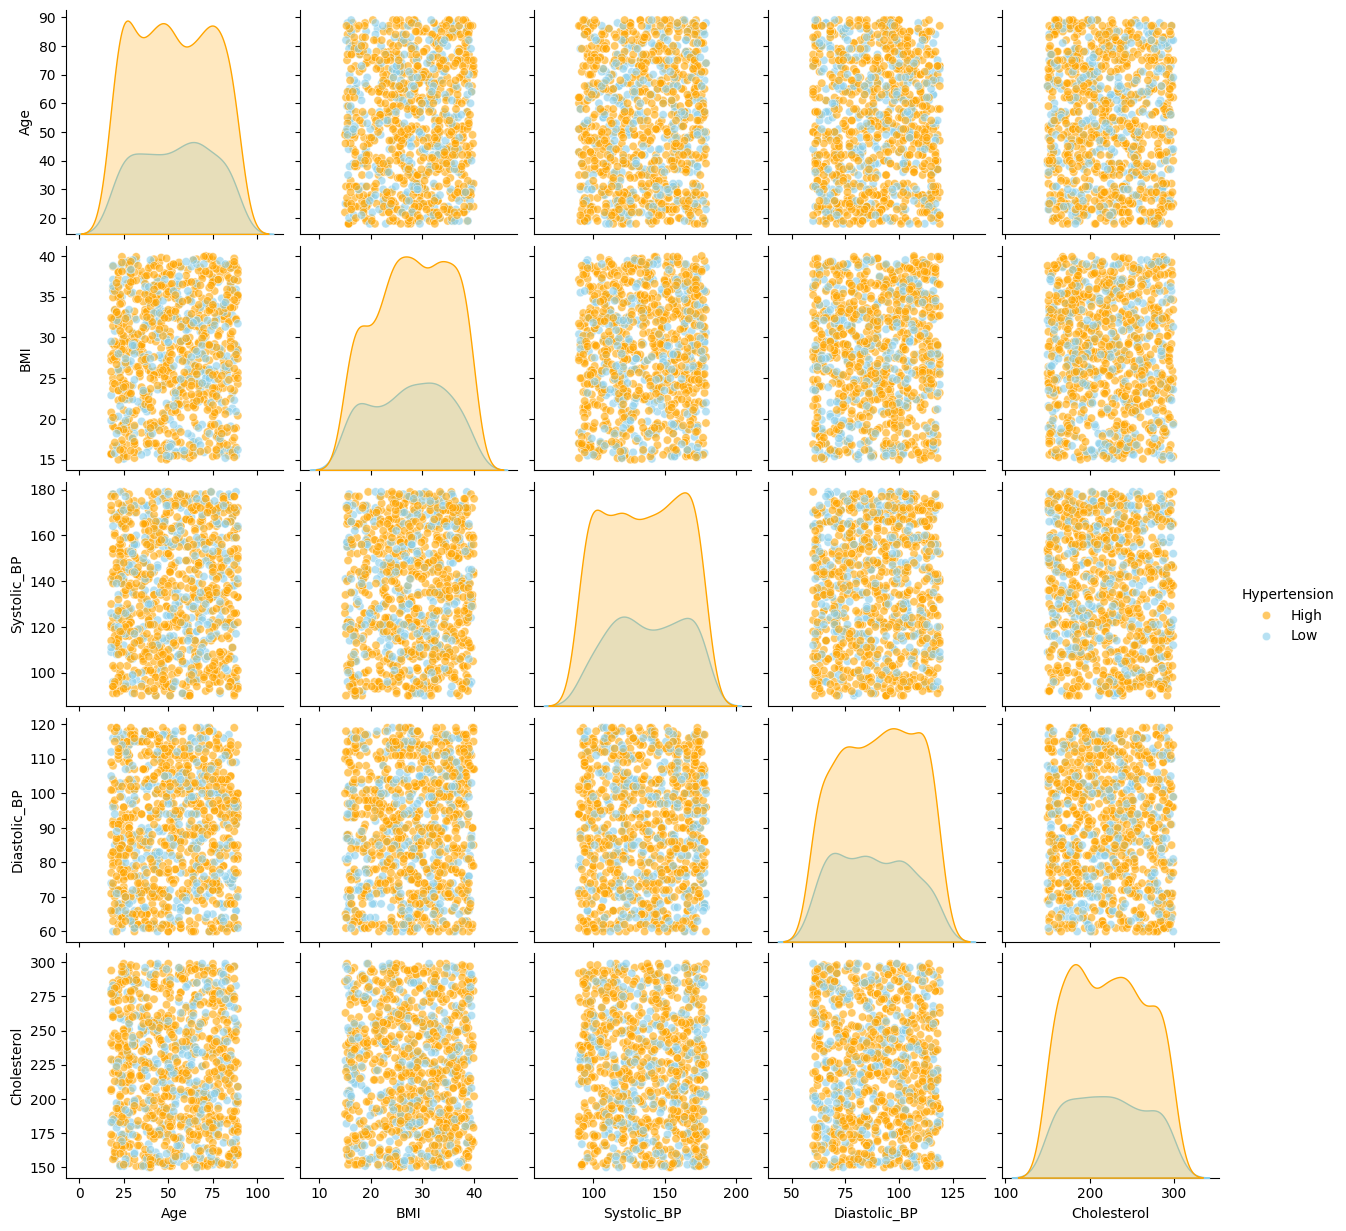

In [45]:
variables = ["Age", "BMI", "Systolic_BP", "Diastolic_BP", "Cholesterol"]
df_sample = df_hypertension.sample(1000, random_state=42)
sns.pairplot(df_sample, vars=variables, hue="Hypertension", 
             palette={"Low": "skyblue", "High": "orange"}, 
             diag_kind="kde", plot_kws={"alpha": 0.6})
plt.show()

# **Hypertension Dataset Bivariate Conclusions:**
Age: The normalized bar plot shows that the proportion of individuals with hypertension increases with age.
BMI: This is more of a mixed pattern, raw counts show that individuals with a recorded 'normal' BMI have hi hypertension, but when considering the proportions in each group the higher BMI groups tend to have a higher proportion of hypertension reportings. This suggests that BMI could be moderately associated with hypertension risk. 
Smoking: Normalized bar plot suggests very similar proportions of low and high hypertensions across all smoking status levels: current, former and never. This suggests that smoking may not be strongly associated with hypertension. 
Physical Activity: Similarly to the smoking data, there are not very prominant differences within this visual. This does not show a strong correlation between physical activity and hypertension in this data. 

# **Kidney Dataset**

## Bar Plot Physical Activity and CKD

/tmp/ipykernel_1746/2505386380.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_kidney.groupby(["PhysicalActivityLevel", "Diagnosis"]).size().unstack(fill_value=0)


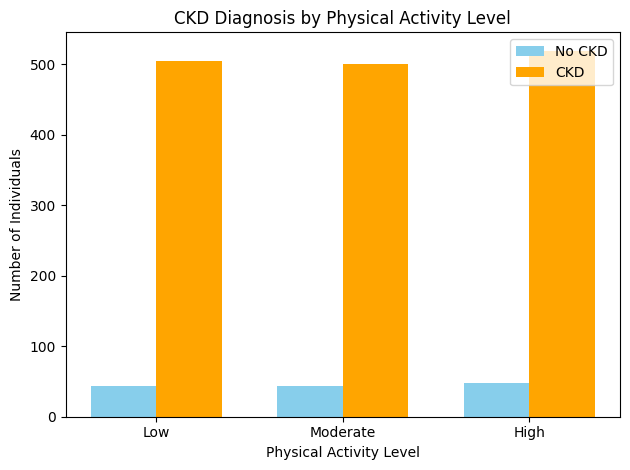

In [ ]:
bins = [0, 3.3, 6.6, 10]
labels = ["Low", "Moderate", "High"]

# Create a new column for binned physical activity
df_kidney["PhysicalActivityLevel"] = pd.cut(df_kidney["PhysicalActivity"], bins=bins, labels=labels)

counts = df_kidney.groupby(["PhysicalActivityLevel", "Diagnosis"]).size().unstack(fill_value=0)
x = np.arange(len(counts.index))
width = 0.35
fig, ax = plt.subplots()
ax.bar(x - width/2, counts[0], width, label="No CKD", color='skyblue')
ax.bar(x + width/2, counts[1], width, label="CKD", color='orange')

ax.set_xlabel("Physical Activity Level")
ax.set_ylabel("Number of Individuals")
ax.set_title("CKD Diagnosis by Physical Activity Level")
ax.set_xticks(x)
ax.set_xticklabels(counts.index)
ax.legend()

plt.tight_layout()
plt.show()


## Scatter Plot BMI and GFR (Glomerular Filteration Rate- "how much blood kidneys filter per min")

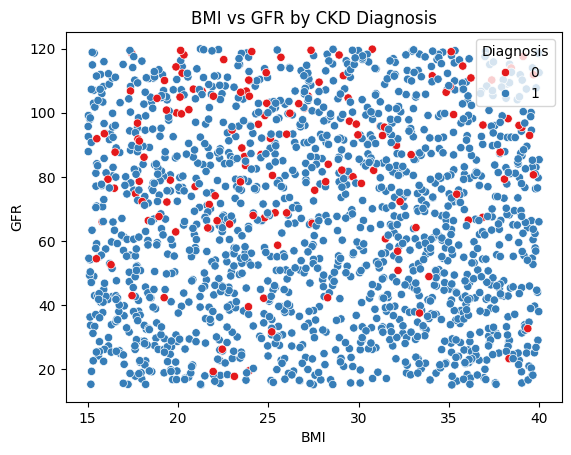

In [ ]:
sns.scatterplot(data=df_kidney, x="BMI", y="GFR", hue="Diagnosis", palette="Set1")
plt.title("BMI vs GFR by CKD Diagnosis")
plt.xlabel("BMI")
plt.ylabel("GFR")
plt.show()

## Scatter Plot Age and GFR

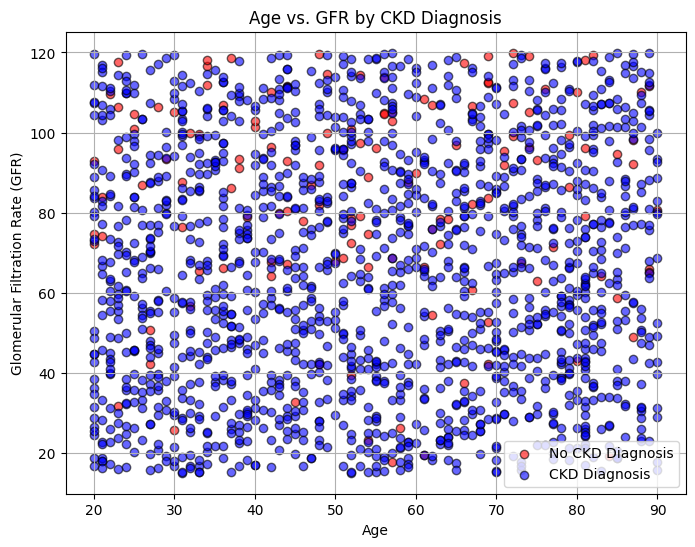

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    df_kidney[df_kidney["Diagnosis"] == 0]["Age"],
    df_kidney[df_kidney["Diagnosis"] == 0]["GFR"],
    color='red',
    alpha=0.6,
    edgecolor='k',
    label='No CKD Diagnosis')
plt.scatter(
    df_kidney[df_kidney["Diagnosis"] == 1]["Age"],
    df_kidney[df_kidney["Diagnosis"] == 1]["GFR"],
    color='blue',
    alpha=0.6,
    edgecolor='k',
    label='CKD Diagnosis'
)

plt.title("Age vs. GFR by CKD Diagnosis")
plt.xlabel("Age")
plt.ylabel("Glomerular Filtration Rate (GFR)")
plt.legend()
plt.grid(True)
plt.show()

## Bar Plot Smoking Status and Diagnosis

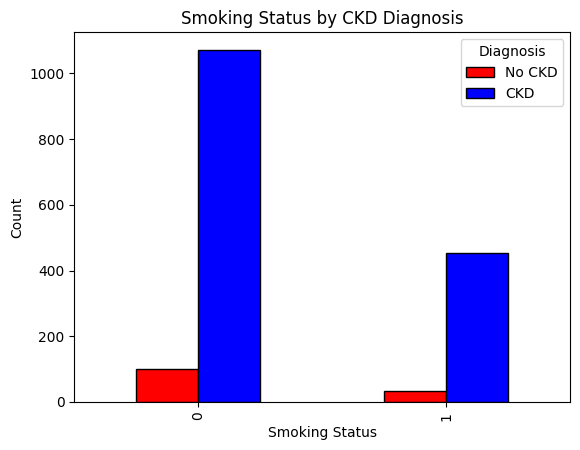

In [ ]:
smoking_counts = df_kidney.groupby(['Smoking', 'Diagnosis']).size().unstack(fill_value=0)

smoking_counts.plot(kind='bar', stacked=False, color=['red', 'blue'], edgecolor='black')
plt.title("Smoking Status by CKD Diagnosis")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.legend(title='Diagnosis', labels=['No CKD', 'CKD'])
plt.show()


## Box Plot BMI and Diagnosis

/tmp/ipykernel_1746/989112112.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='BMI', data=df_kidney, palette=['red', 'blue'])


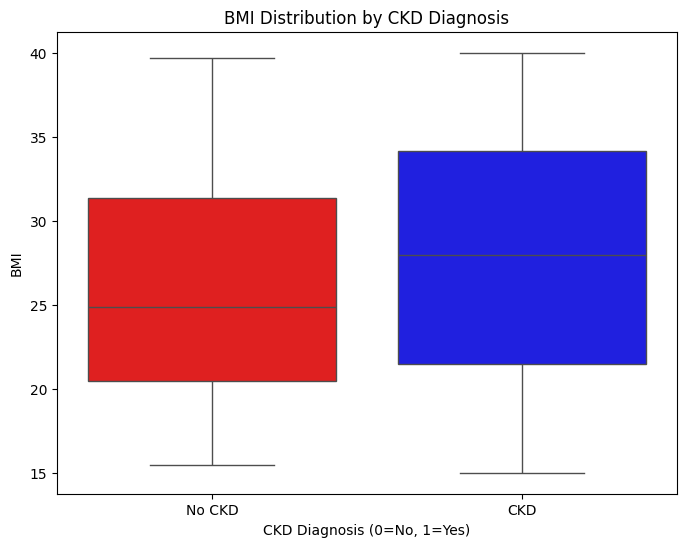

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Diagnosis', y='BMI', data=df_kidney, palette=['red', 'blue'])
plt.title('BMI Distribution by CKD Diagnosis')
plt.xlabel('CKD Diagnosis (0=No, 1=Yes)')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No CKD', 'CKD'])
plt.show()

## Pairplot Kidney Dataset

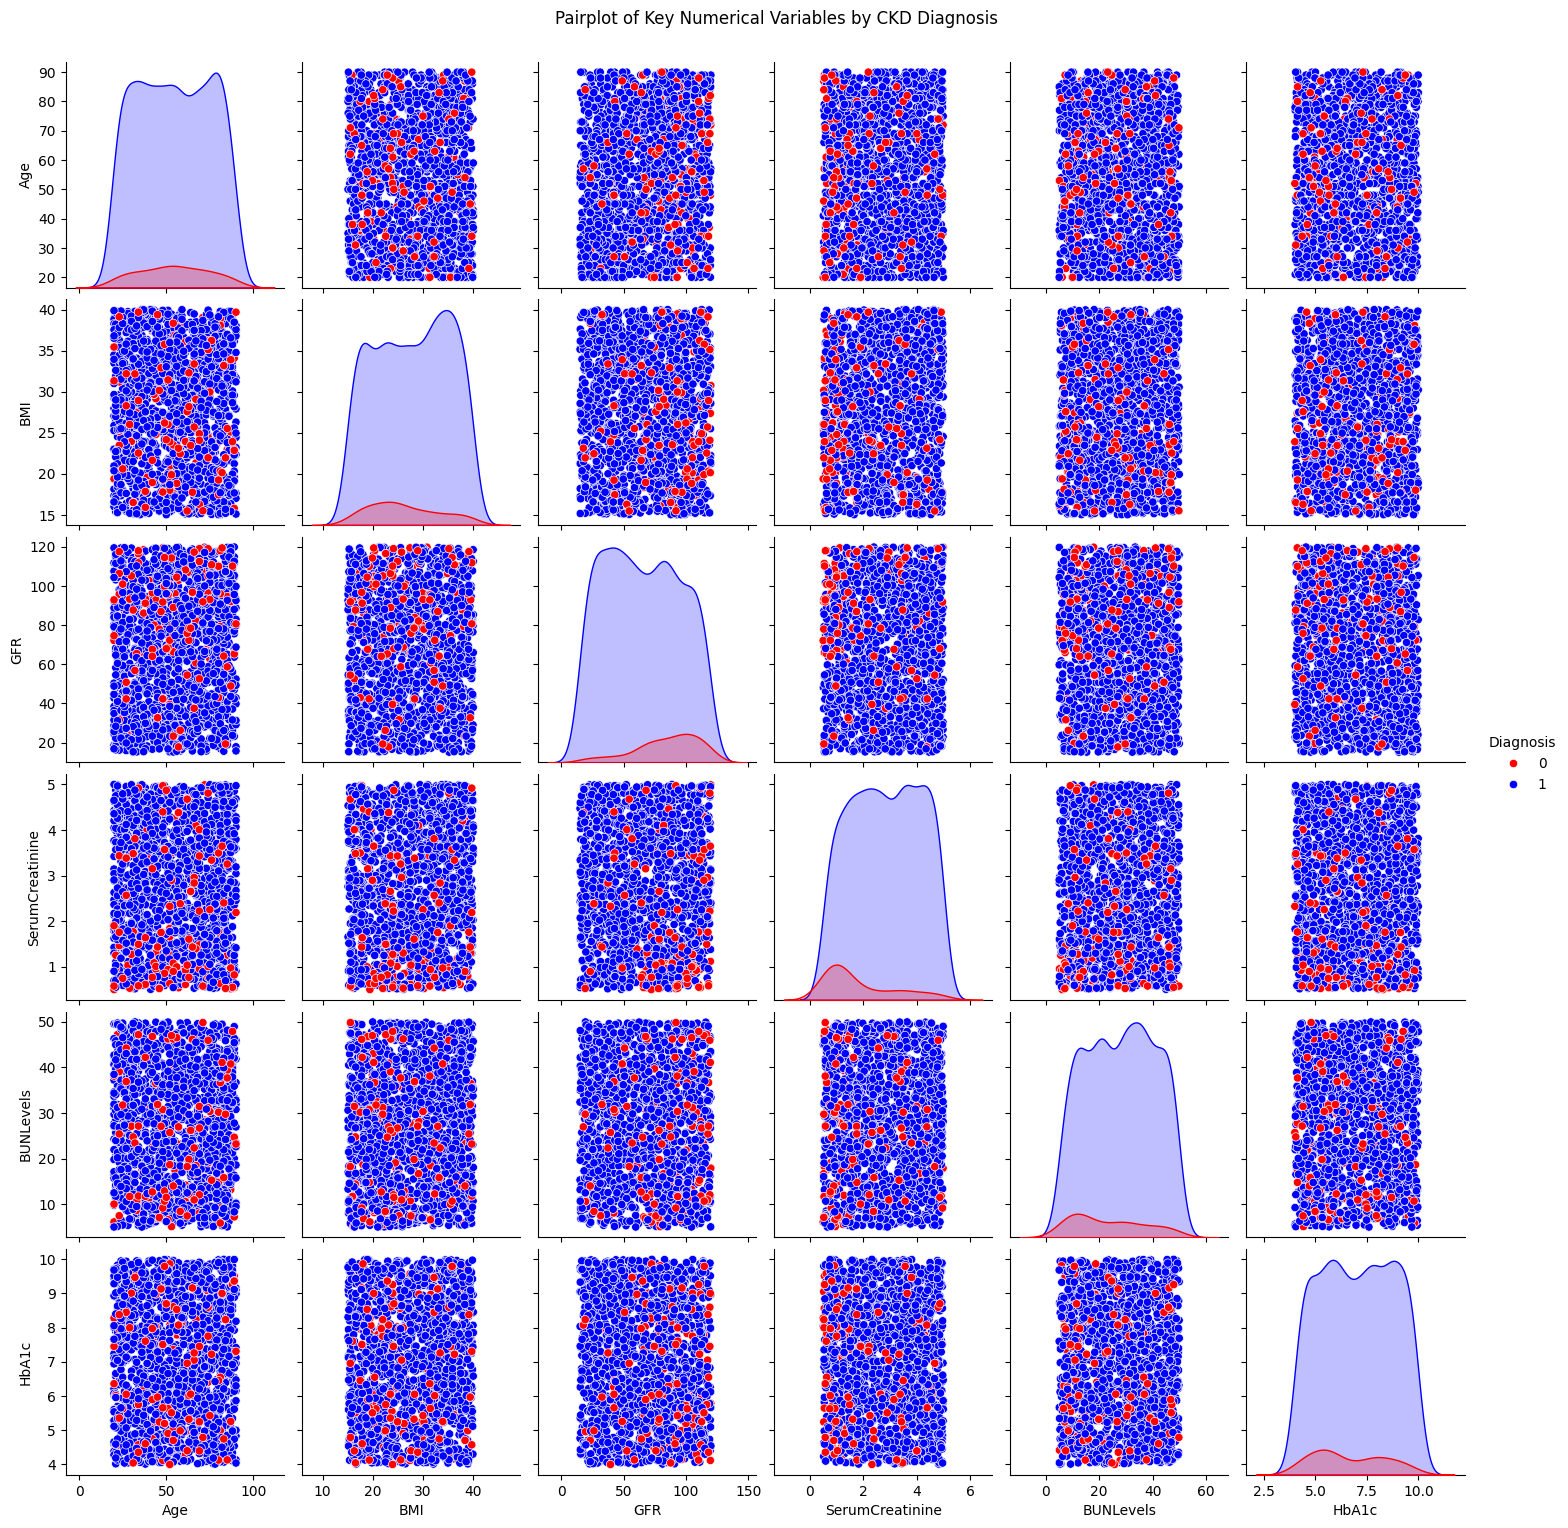

In [ ]:
cols = ['Age', 'BMI', 'GFR', 'SerumCreatinine', 'BUNLevels', 'HbA1c', 'Diagnosis']

sns.pairplot(df_kidney[cols], hue='Diagnosis', diag_kind='kde', palette=['red', 'blue'])
plt.suptitle('Pairplot of Key Numerical Variables by CKD Diagnosis', y=1.02)
plt.show()

# **Kidney Dataset Bivariate Conclusions:**

The data appears usable and comprehensive, covering demographic and lifestyle variables relevant to CKD and our main question. The relationships between these variables seem to align with medical expectations. The data quality is sufficient for further modeling and analysis. There are outliers that are more visible within the above scatterplots(ex: low GFR regardless of BMI). Some variables could act as confounders in the relationships observed above. Age and BMI for example when looking at kidney function. 

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

## Example of Grouped Bar Chart (page 86)

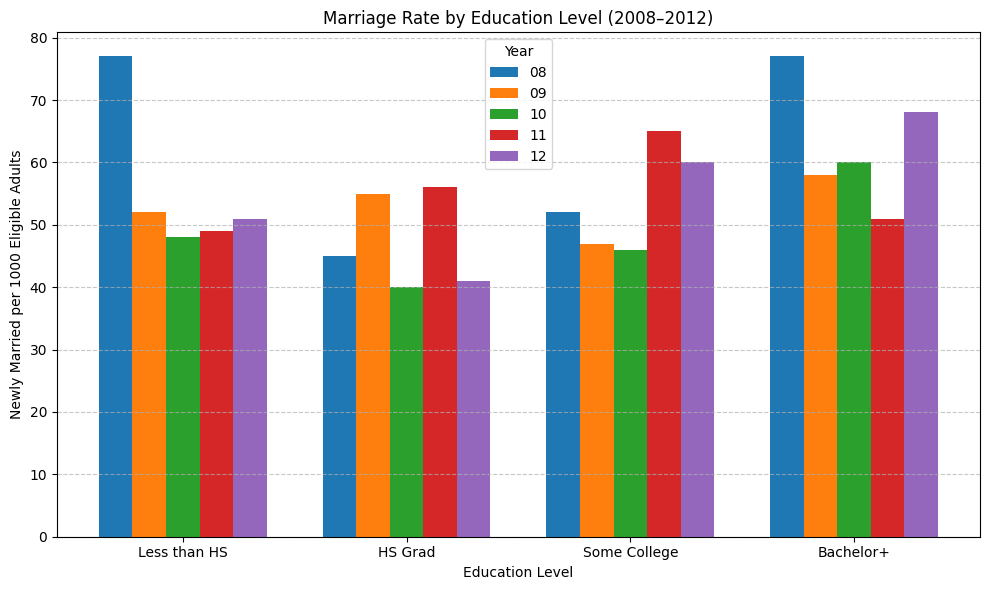

: 

In [ ]:
education_levels = ['Less than HS', 'HS Grad', 'Some College', 'Bachelor+']
years = ['08', '09', '10', '11', '12']

np.random.seed(1)
data = np.random.randint(40, 80, size=(len(education_levels), len(years)))

df = pd.DataFrame(data, index=education_levels, columns=years)

x = np.arange(len(education_levels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))

for i, year in enumerate(years):
    ax.bar(x + i*width, df[year], width, label=year)

ax.set_xlabel('Education Level')
ax.set_ylabel('Newly Married per 1000 Eligible Adults')
ax.set_title('Marriage Rate by Education Level (2008–2012)')
ax.set_xticks(x + width*2)
ax.set_xticklabels(education_levels)
ax.legend(title="Year")

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
